# Importing Required Librarires

In [1]:
#Importing python librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
import cufflinks as cf
import plotly.graph_objs as go
import nltk
import string
import nltk.corpus
import nltk.stem.snowball
import gensim
import gensim.corpora as corpora
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
import re
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
import requests
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from nltk.corpus import wordnet
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(string.punctuation)
stopwords.append('')

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
from pprint import pprint

# Loading Datasets

In [2]:
#Uploading cleaned_hm dataset

data1 = pd.read_csv("cleaned_hm.csv", encoding="utf-8")
data1.head(2)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection


In [3]:
#Uploading demographic dataset

data2 = pd.read_csv("demographic.csv", encoding="utf-8")
data2.head(2)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y


# Merging Datasets

In [4]:
data3 = pd.merge(data1, data2, on = 'wid', validate = 'm:1')
data3.head(2)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,gender,marital,parenthood
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,35,USA,m,single,n
1,27873,2053,24h,I played a new game that was fun and got to en...,I played a new game that was fun and got to en...,True,1,NaN,leisure,35,USA,m,single,n


# EDA

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



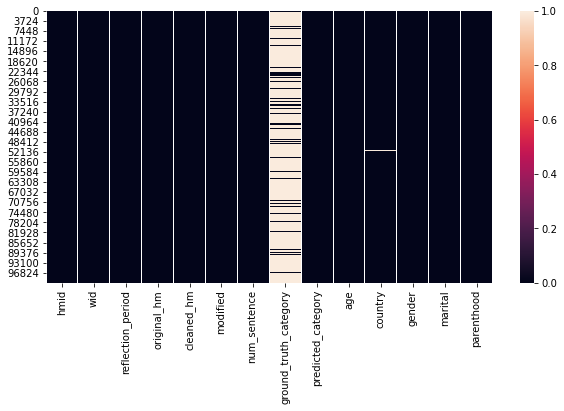

In [5]:
#Check for nulls visually
plt.figure(figsize = (10, 5))
sns.heatmap(data3.isnull(), cbar = True);

In [6]:
#Checking for null values
data3.isnull().sum()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



hmid                         0
wid                          0
reflection_period            0
original_hm                  0
cleaned_hm                   0
modified                     0
num_sentence                 0
ground_truth_category    86410
predicted_category           0
age                         93
country                    203
gender                      79
marital                    157
parenthood                  78
dtype: int64

In [7]:
#Droping the ground_truth_category
data3.drop('ground_truth_category', inplace=True, axis=1)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [8]:
#Drop nulls
data3.dropna(inplace = True, axis=0)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [9]:
data3.columns

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['hmid', 'wid', 'reflection_period', 'original_hm', 'cleaned_hm',
       'modified', 'num_sentence', 'predicted_category', 'age', 'country',
       'gender', 'marital', 'parenthood'],
      dtype='object')

In [10]:
data3.drop(index = data3[data3['age'] == 'čá'].index, inplace=True)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [11]:
data3.drop(index = data3[data3['age'] == 'prefer not to say'].index, inplace=True)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [12]:
data3.drop(index = data3[data3['gender'] == 'o'].index, inplace=True)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Encoding categorical 

In [13]:
pd.pivot_table(data3, values='hmid',index='reflection_period', aggfunc='count')

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid
reflection_period,
24h,49252
3m,50091


In [14]:
#Replacing reflection_period values

data3.loc[data3['reflection_period']=='24h', 'reflection_period']=0
data3.loc[data3['reflection_period']=='3m', 'reflection_period']=1
data3.rename(columns={'3m': '3m or 24h'}, inplace=True)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [15]:
pd.pivot_table(data3, values='hmid',index='reflection_period', aggfunc='count')

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid
reflection_period,
0,49252
1,50091


In [16]:
pd.pivot_table(data3, values='hmid',index='marital', aggfunc='count')

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid
marital,
divorced,3761
married,40933
separated,628
single,53553
widowed,468


In [17]:
#Replacing  marital with numerical values (married=1) or (not-married=0)
data3.loc[data3['marital']=='single', 'marital']=0
data3.loc[data3['marital']=='married', 'marital']=1
data3.loc[data3['marital']=='separated', 'marital']=0
data3.loc[data3['marital']=='divorced', 'marital']=0
data3.loc[data3['marital']=='widowed', 'marital']=0

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [18]:
pd.pivot_table(data3, values='hmid',index='marital', aggfunc='count')

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid
marital,
0,58410
1,40933


In [19]:
pd.pivot_table(data3, values='hmid',index='gender', aggfunc='count')

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid
gender,
f,41847
m,57496


In [20]:
#Replacing  marital with numerical values: (f=1) or (m and o =0)
data3.loc[data3['gender']=='m', 'gender']=0
data3.loc[data3['gender']=='f', 'gender']=1

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [21]:
#Predicted_category
pd.pivot_table(data3, values='hmid',index='predicted_category', aggfunc='count')

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid
predicted_category,
achievement,33600
affection,33744
bonding,10601
enjoy_the_moment,11002
exercise,1188
leisure,7385
nature,1823


In [22]:
#Replacing predicted_category by numerical values aligned to 360 Living categories
data3.loc[data3['predicted_category']=='achievement', 'predicted_category']=3
data3.loc[data3['predicted_category']=='affection', 'predicted_category']=6
data3.loc[data3['predicted_category']=='bonding', 'predicted_category']=5
data3.loc[data3['predicted_category']=='enjoy_the_moment', 'predicted_category']=2
data3.loc[data3['predicted_category']=='exercise', 'predicted_category']=1
data3.loc[data3['predicted_category']=='leisure', 'predicted_category']=7
data3.loc[data3['predicted_category']=='nature', 'predicted_category']=4

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [23]:
pd.pivot_table(data3, values='hmid',index='predicted_category', aggfunc='count')

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid
predicted_category,
1,1188
2,11002
3,33600
4,1823
5,10601
6,33744
7,7385


In [24]:
#Parenthood column
pd.pivot_table(data3, values='hmid',index='parenthood', aggfunc='count')

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid
parenthood,
n,60313
y,39030


In [25]:
#Replace parenthood
data3.loc[data3['parenthood']=='n', 'parenthood']=0
data3.loc[data3['parenthood']=='y', 'parenthood']=1

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [26]:
pd.pivot_table(data3, values='hmid',index='parenthood', aggfunc='count')

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid
parenthood,
0,60313
1,39030


In [27]:
#Checking for unige values
data3.country.unique()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array(['USA', 'IND', 'DNK', 'VNM', 'KWT', 'PHL', 'GBR', 'FIN', 'AUS',
       'VEN', 'LTU', 'BGR', 'BGD', 'IDN', 'BEL', 'CAN', 'SGP', 'IRL',
       'PER', 'PRT', 'URY', 'SRB', 'JAM', 'ITA', 'KEN', 'DOM', 'EGY',
       'ESP', 'NGA', 'BRA', 'MEX', 'ARM', 'PAK', 'TUR', 'MKD', 'FRA',
       'COL', 'GRC', 'MDA', 'POL', 'DZA', 'THA', 'ARE', 'UGA', 'MYS',
       'ZAF', 'AUT', 'DEU', 'LKA', 'NZL', 'ROU', 'ETH', 'PRI', 'RUS',
       'NIC', 'NLD', 'UMI', 'ALB', 'ISR', 'MUS', 'MAR', 'SWE', 'KAZ',
       'ASM', 'TTO', 'JPN', 'AFG', 'KNA', 'CYP', 'TUN', 'HRV', 'ECU',
       'KOR', 'HKG', 'SAU', 'CRI', 'BRB', 'CZE', 'EST', 'GMB', 'BHS',
       'ISL', 'SUR', 'GTM', 'GHA', 'MLT', 'TCA', 'IRQ', 'ARG', 'ZMB',
       'TWN', 'CHL', 'SVN', 'UKR', 'VIR', 'NPL', 'SLV', 'NOR', 'LVA'],
      dtype=object)

In [28]:
pd.pivot_table(data3, values='hmid',index='country', dropna=True,aggfunc='count').sort_values('hmid', ascending=False).head(10)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid
country,
USA,78151
IND,16708
VEN,588
CAN,549
GBR,361
PHL,279
MEX,126
VNM,126
BRA,123


In [29]:
#Replacing country by numerical values only for top5 countries, all others are 5
data3.loc[data3['country']=='USA', 'country']=1
data3.loc[data3['country']=='IND', 'country']=0
data3.loc[data3['country']=='VEN', 'country']=0
data3.loc[data3['country']=='CAN', 'country']=0
data3.loc[data3['country']=='GBR', 'country']=0
pd.pivot_table(data3, values='hmid',index='country', dropna=True,aggfunc='count').sort_values('hmid', ascending=False).head(10)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid
country,
1,78151
0,18206
PHL,279
VNM,126
MEX,126
BRA,123
AUS,117
MKD,102
SRB,96


In [30]:
#Defining function to convert sting values
def convert_string(x):
    if isinstance(x, str) == True:
        return 0
    else: return x
data3['country']=data3['country'].apply(lambda x: convert_string(x))

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [31]:
pd.pivot_table(data3, values='hmid',index='country', dropna=True,aggfunc='count').sort_values('hmid', ascending=False)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hmid
country,
1,78151
0,21192


In [32]:
#Checking for unige values
data3.age.unique()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array(['35', '29.0', '30', '28', '55', '23', '25', '41', '37', '29', '39',
       '25.0', '32.0', '38', '42', '27', '22', '47.0', '26', '79', '64',
       '32', '34', '33', '48', '40', '61', '31', '66', '36', '18', '56',
       '30.0', '37.0', '51', '42.0', '24', '62', '28.0', '23.0', '44',
       '21', '45.0', '45', '46', '41.0', '33.0', '49', '22.0', '52', '3',
       '65', '31.0', '19.0', '53', '35.0', '24.0', '26.0', '63', '34.0',
       '36.0', '61.0', '57', '43.0', '20.0', '38.0', '48.0', '53.0',
       '27.0', '39.0', '51.0', '50.0', '21.0', '44.0', '58.0', '58', '43',
       '52.0', '60.0', '49.0', '50', '54.0', '19', '40.0', '55.0', '20',
       '54', '56.0', '71.0', '98', '18.0', '73.0', '69', '57.0', '70',
       '60', '59', '70.0', '227', '68', '47', '71', '72', '46.0', '65.0',
       '83', '67', '2', '64.0', '62.0', '78.0', '59.0', '63.0', '68.0',
       '88.0', '72.0', '66.0', '76.0', '69.0', '77', '74', '81.0', '2.0',
       '233.0', '67.0', '75', '79.0', '95', '80', '60

In [33]:
#Converting values to numeric
data3[['age']] = data3[['age']].apply(pd.to_numeric, errors='coerce')

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [34]:
#Create age-groups
age18_25 = data3.age[(data3.age <= 25) & (data3.age >= 18)]
age26_35 = data3.age[(data3.age <= 35) & (data3.age >= 26)]
age36_45 = data3.age[(data3.age <= 45) & (data3.age >= 36)]
age46_55 = data3.age[(data3.age <= 55) & (data3.age >= 46)]
age55above = data3.age[data3.age >= 56]

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [35]:
data_age = {'Ages': ["18-25", "26-35", "36-45", "46-55", "55+"],
        'Number of People': [len(age18_25.values), len(age26_35.values), len(age36_45.values),
                             len(age46_55.values), len(age55above.values)]} 

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [36]:
df_age = pd.DataFrame(data_age)
df_age

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Ages,Number of People
0,18-25,23868
1,26-35,48596
2,36-45,16426
3,46-55,6220
4,55+,4128


C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



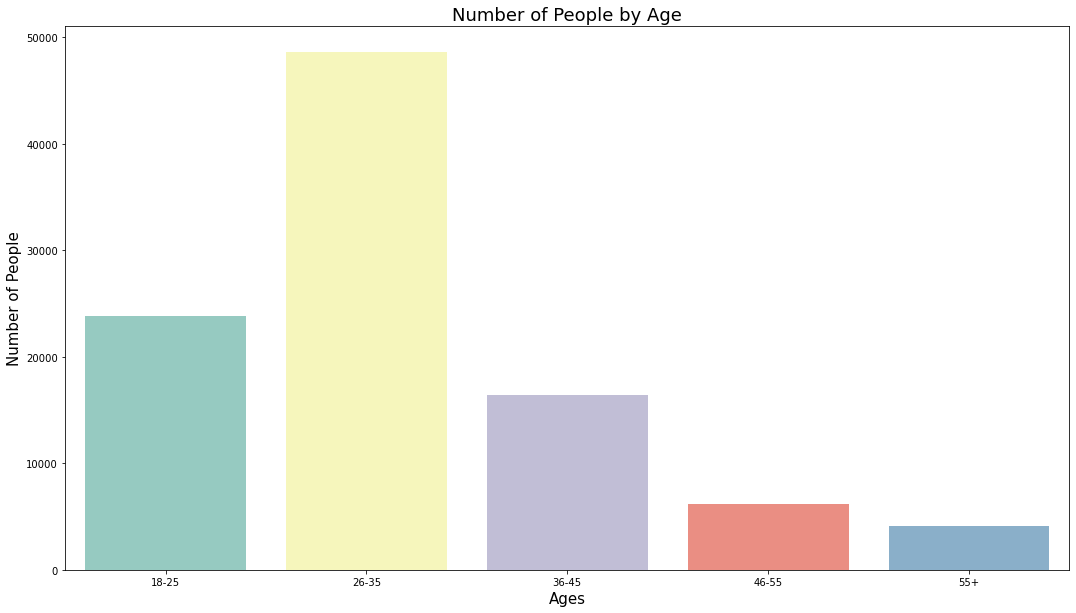

In [37]:
plt.figure(figsize = (18, 10))

sns.barplot(x = 'Ages', y = 'Number of People', data = df_age, palette = 'Set3')

plt.title('Number of People by Age', fontsize = 18)
plt.ylabel('Number of People', fontsize = 15)
plt.xlabel('Ages', fontsize = 15);

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\Manal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Manal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Manal\anaconda3\lib\site-packages\seaborn\_d

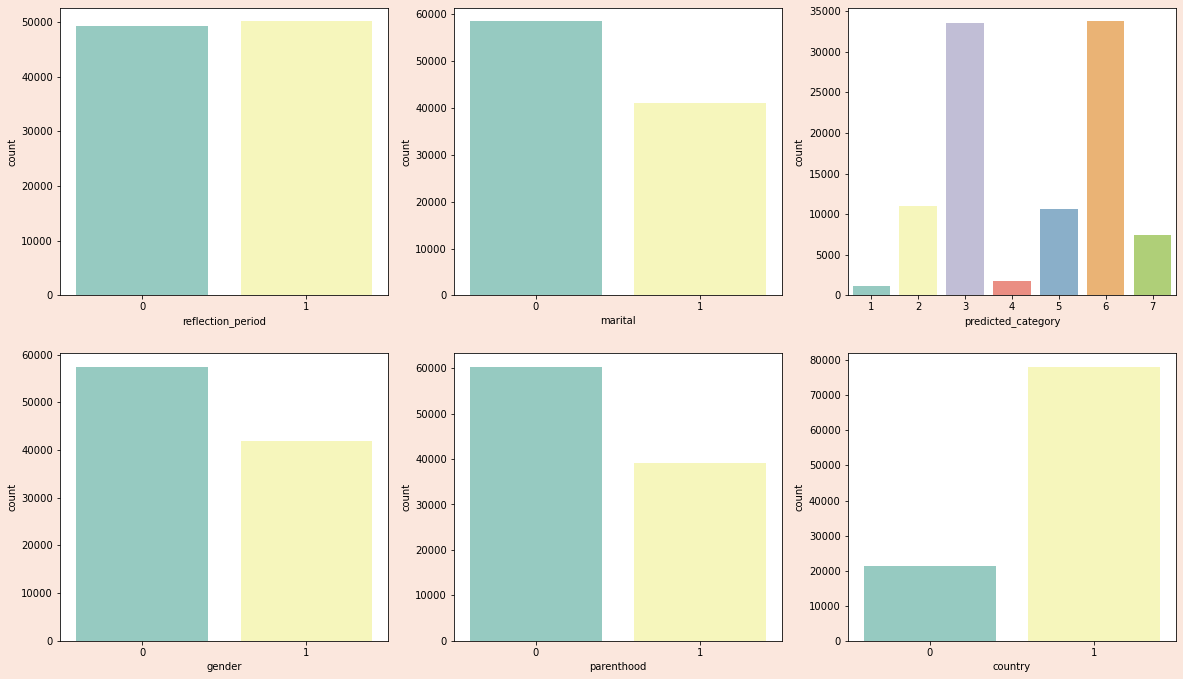

In [38]:
# feature selections
cols = [ 'reflection_period', 'marital', 'predicted_category',
        'gender', 'parenthood','country']

fig = plt.figure(figsize = (20, 18), facecolor='#fbe7dd')



for i in range(len(cols)):
    fig.add_subplot(3, 3, i+1)
    sns.countplot(data3[cols[i]], palette='Set3')

plt.show()

In [39]:
cols

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['reflection_period',
 'marital',
 'predicted_category',
 'gender',
 'parenthood',
 'country']

# Preprocessing

## Feature Extraction

In [40]:
df = data3['cleaned_hm']

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [41]:
df.head()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    I went on a successful date with someone I fel...
1    I played a new game that was fun and got to en...
2    I listened to some music and heard an entire a...
3                   Went to see a movie with my friend
4                 Played guitar, learning a song on it
Name: cleaned_hm, dtype: object

In [42]:
stop_words = stopwords.words('english')

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [43]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [44]:
print(df.unique())

['I went on a successful date with someone I felt sympathy and connection with.'
 'I played a new game that was fun and got to enjoy the mechanics of it.'
 "I listened to some music and heard an entire album I hadn't heard more than once before."
 ...
 'Four year back I lost my job. Now I am living with my savings and needs some earning with easy work. Though I am 65 years old, but with god grace enjoying good health. Today I received a call from a employer for a job description which suits to me. This made me happy.\r\n"HOPE FOR THE BEST".'
 'Yesterday evening I received a call from unknown number. He asked me to recognize him, but I could not. He told me that he is my school days friend, Madan. I asked how he get my contact number. He told that he went to our native place and take my number from younger brother. We refreshed our old early days of our life, which make me happy.\r\n"REFRESHING THE OLD MEMORIES".'
 'I am fond of seeing cricket match. Yesterday there was semi final of ch

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [45]:
# Convert to list
data = df.values.tolist()
 
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
 
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
 
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]
 
print(data[:1])

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:5: DeprecationWarning:

invalid escape sequence \S

<>:8: DeprecationWarning:

invalid escape sequence \s

<>:5: DeprecationWarning:

invalid escape sequence \S

<>:8: DeprecationWarning:

invalid escape sequence \s

<ipython-input-45-1341c7212117>:5: DeprecationWarning:

invalid escape sequence \S

<ipython-input-45-1341c7212117>:8: DeprecationWarning:

invalid escape sequence \s



['I went on a successful date with someone I felt sympathy and connection with.']


In [46]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
 
data_words = list(sent_to_words(data))
 
print(data_words[:1])

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['went', 'on', 'successful', 'date', 'with', 'someone', 'felt', 'sympathy', 'and', 'connection', 'with']]


In [47]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
 
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
 
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['went', 'on', 'successful', 'date', 'with', 'someone', 'felt', 'sympathy', 'and', 'connection', 'with']


In [48]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
 
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
 
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
 
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [49]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
 
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
 
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
 
print(data_lemmatized[:1])

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['date', 'connection']]


In [50]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
 
# Create Corpus
texts = data_lemmatized
 
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
 
# View
print(corpus[:1])

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[[(0, 1), (1, 1)]]


In [51]:
id2word[0]

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'connection'

In [52]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[[('connection', 1), ('date', 1)]]

# Topic Modeling 

## LDA

In [53]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [54]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.125*"year" + 0.124*"yesterday" + 0.103*"morning" + 0.097*"home" + '
  '0.034*"sister" + 0.034*"phone" + 0.025*"summer" + 0.021*"breakfast" + '
  '0.020*"book" + 0.015*"father"'),
 (1,
  '0.210*"work" + 0.185*"friend" + 0.099*"dinner" + 0.024*"coffee" + '
  '0.021*"talk" + 0.020*"evening" + 0.018*"mail" + 0.016*"team" + '
  '0.016*"visit" + 0.013*"person"'),
 (2,
  '0.181*"month" + 0.057*"child" + 0.052*"baby" + 0.038*"class" + 0.036*"gift" '
  '+ 0.024*"state" + 0.022*"bonus" + 0.021*"gym" + 0.021*"head" + '
  '0.020*"song"'),
 (3,
  '0.100*"wife" + 0.055*"food" + 0.033*"college" + 0.025*"smile" + '
  '0.023*"student" + 0.023*"exam" + 0.022*"music" + 0.020*"grade" + '
  '0.017*"door" + 0.017*"meeting"'),
 (4,
  '0.215*"day" + 0.098*"son" + 0.075*"job" + 0.065*"school" + 0.036*"mother" + '
  '0.029*"video" + 0.018*"couple" + 0.017*"afternoon" + 0.016*"help" + '
  '0.014*"interview"'),
 (5,
  '0.075*"money" + 0.057*"house" + 0.053*"movie" + 0.051*"vacation" + '
  '0.043*"call" 

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [55]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
 
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Perplexity:  -7.578415474572545

Coherence Score:  0.3190302762591635


In [56]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.452108 -0.024569       1        1  19.535810
4     -0.026654  0.439577       2        1  12.774061
1     -0.019678  0.019185       3        1  11.614490
7     -0.037181 -0.103932       4        1  10.509684
0     -0.045176 -0.104281       5        1   9.938543
9     -0.067520 -0.046928       6        1   8.265812
3     -0.067577 -0.045597       7        1   7.579520
2     -0.057675 -0.044387       8        1   6.880388
6     -0.062426 -0.044877       9        1   6.680837
5     -0.068222 -0.044193      10        1   6.220854, topic_info=          Term          Freq         Total Category  logprob  loglift
44         day  10497.000000  10497.000000  Default  30.0000  30.0000
21        work   9336.000000   9336.000000  Default  29.0000  29.0000
7       friend   8229.000000   8229.000000  Default  28.0000  28.0000
105       time   9501.000000   9501.000000  Default  27.0000  27.0000
68       month   4758.000000   4758.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
1971  graduate    230.928119    231.820412  Topic10  -4.6340   2.7734
1304  tomorrow    226.692078    227.584455  Topic10  -4.6525   2.7733
56     holiday    217.310566    218.202876  Topic10  -4.6948   2.7732
2536  question    196.490209    197.382562  Topic10  -4.7955   2.7727
753   practice    178.914095    179.806478  Topic10  -4.8892   2.7723

[330 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
549       4  0.995093    account
950       7  0.996824   activity
378       2  0.998935  afternoon
262       9  0.997850     amazon
766      10  0.997509     amount
...     ...       ...        ...
517       2  0.997986    workout
675       2  0.998142       yard
177       5  0.999715       year
38        5  0.999869  yesterday
95        8  0.994770       yoga

[300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 5, 2, 8, 1, 10, 4, 3, 7, 6])

In [57]:
for idx, topic in lda_model.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(idx, '|'.join([w[0] for w in topic])))

Topic: 0 
Words: year|yesterday|morning|home|sister|phone|summer|breakfast|book|father|dollar|ice_cream|picture|garden|niece|cousin|chicken|step|thought|use|toddler|weight|marriage|check|relief|title|radio|childhood|paper|plant
Topic: 1 
Words: work|friend|dinner|coffee|talk|evening|mail|team|visit|person|tonight|laugh|dish|email|mine|baseball|catch|issue|road|group|joke|treat|award|client|turn|nap|basketball|manager|need|situation
Topic: 2 
Words: month|child|baby|class|gift|state|bonus|gym|head|song|neighbor|number|boy|joy|birth|function|exercise|business|course|service|toy|yoga|buy|self|employer|fan|pet|payment|peace|training
Topic: 3 
Words: wife|food|college|smile|student|exam|music|grade|door|meeting|grandmother|water|apartment|word|room|mood|episode|result|mind|kitchen|hug|progress|bike|ball|match|nephew|drive|semester|name|activity
Topic: 4 
Words: day|son|job|school|mother|video|couple|afternoon|help|interview|face|office|computer|task|bit|problem|rain|date|yard|opportunity|po

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [58]:
pic = np.array(Image.open(requests.get('http://clipart-library.com/images/rijrpLo8T.jpg',stream=True).raw))
wordcloud = WordCloud(width = 800, height = 800,background_color ='white')

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 0:


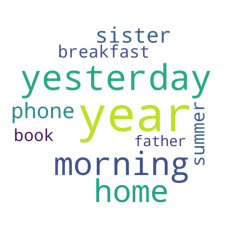

In [59]:
print('Topic 0:')
plt.figure() 
plt.imshow(WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).fit_words(dict(lda_model.show_topic(0, 10))))

plt.axis("off")
plt.show()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 1:


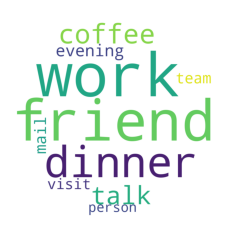

In [60]:
print('Topic 1:')
plt.figure() 
plt.imshow(WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).fit_words(dict(lda_model.show_topic(1, 10))))

plt.axis("off")
plt.show()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 2:


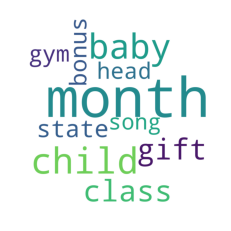

In [61]:
print('Topic 2:')
plt.figure() 
plt.imshow(WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).fit_words(dict(lda_model.show_topic(2, 10))))

plt.axis("off")
plt.show()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 3:


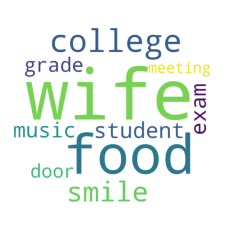

In [62]:
print('Topic 3:')
plt.figure() 
plt.imshow(WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).fit_words(dict(lda_model.show_topic(3, 10))))

plt.axis("off")
plt.show()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 4:


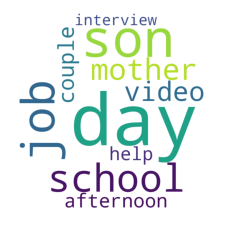

In [63]:
print('Topic 4:')
plt.figure() 
plt.imshow(WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).fit_words(dict(lda_model.show_topic(4, 10))))

plt.axis("off")
plt.show()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 5:


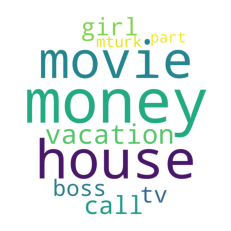

In [64]:
print('Topic 5:')
plt.figure() 
plt.imshow(WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).fit_words(dict(lda_model.show_topic(5, 10))))

plt.axis("off")
plt.show()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 6:


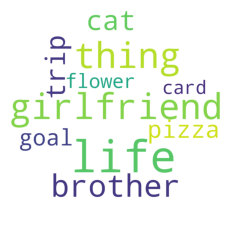

In [65]:
print('Topic 6:')
plt.figure() 
plt.imshow(WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).fit_words(dict(lda_model.show_topic(6, 10))))

plt.axis("off")
plt.show()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 7:


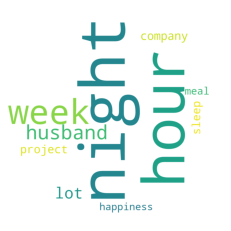

In [66]:
print('Topic 7:')
plt.figure() 
plt.imshow(WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).fit_words(dict(lda_model.show_topic(7, 10))))

plt.axis("off")
plt.show()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 8:


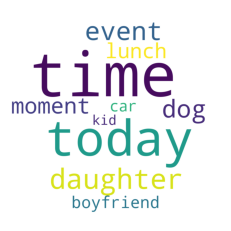

In [67]:
print('Topic 8:')
plt.figure() 
plt.imshow(WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).fit_words(dict(lda_model.show_topic(8, 10))))

plt.axis("off")
plt.show()

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 9:


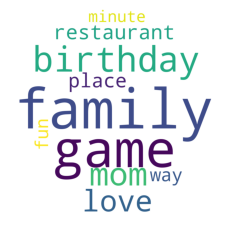

In [68]:
print('Topic 9:')
plt.figure() 
plt.imshow(WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).fit_words(dict(lda_model.show_topic(9, 10))))

plt.axis("off")
plt.show()

In [69]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.125*"year" + 0.124*"yesterday" + 0.103*"morning" + 0.097*"home" + 0.034*"sister" + 0.034*"phone" + 0.025*"summer" + 0.021*"breakfast" + 0.020*"book" + 0.015*"father"


Topic: 1 
Words: 0.210*"work" + 0.185*"friend" + 0.099*"dinner" + 0.024*"coffee" + 0.021*"talk" + 0.020*"evening" + 0.018*"mail" + 0.016*"team" + 0.016*"visit" + 0.013*"person"


Topic: 2 
Words: 0.181*"month" + 0.057*"child" + 0.052*"baby" + 0.038*"class" + 0.036*"gift" + 0.024*"state" + 0.022*"bonus" + 0.021*"gym" + 0.021*"head" + 0.020*"song"


Topic: 3 
Words: 0.100*"wife" + 0.055*"food" + 0.033*"college" + 0.025*"smile" + 0.023*"student" + 0.023*"exam" + 0.022*"music" + 0.020*"grade" + 0.017*"door" + 0.017*"meeting"


Topic: 4 
Words: 0.215*"day" + 0.098*"son" + 0.075*"job" + 0.065*"school" + 0.036*"mother" + 0.029*"video" + 0.018*"couple" + 0.017*"afternoon" + 0.016*"help" + 0.014*"interview"


Topic: 5 
Words: 0.075*"money" + 0.057*"house" + 0.053*"movie" + 0.051*"vacation" + 0.043*"call" + 0.04

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Compute Cosine Similarity

In [70]:
#vectorizer = TfidfVectorizer()
#data_vectorized = vectorizer.fit_transform(data_lemmatized)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [71]:
#doc_term_matrix = data_vectorized.todense()
#df = pd.DataFrame(doc_term_matrix,columns=vectorizer.get_feature_names())
#df.sample(10)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [72]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [73]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



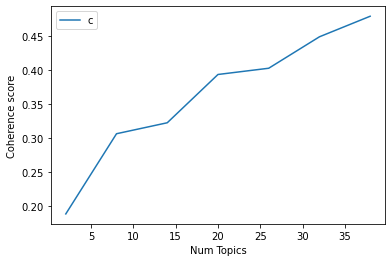

In [74]:
# ploting the graph  for coherenc values
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [75]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.1887
Num Topics = 8  has Coherence Value of 0.3065
Num Topics = 14  has Coherence Value of 0.3226
Num Topics = 20  has Coherence Value of 0.3935
Num Topics = 26  has Coherence Value of 0.4026
Num Topics = 32  has Coherence Value of 0.4488
Num Topics = 38  has Coherence Value of 0.479


C:\Users\Manal\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

